<a href="https://colab.research.google.com/github/Anwesha-dash811/Datavisualization/blob/main/twitter_sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy

In [ ]:
!pip install textblob

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 5.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=0f85793756ebdb1b30fd3321db22a5a61b7b9c05d0c22ad7f6231352ff527040
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
consumer_key = 'luMpQiz2sYG91BdCdk6eaZoSv'
consumer_secret = 'FxCReDaYrbJkwbzYNrH7julRGLYR9AWZIpTYoXjydSuOA97yZO'
access_token = '1350322143498694658-J53NjDLPlNTRzI57bPcVwAiMY7t1F2'
access_token_secret = 'UrcwLqgyGWq6MPFn0SQHWgNw0KCWY4oEEfXVUMrtszlqE'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth)

In [ ]:
#Sentiment Analysis and finding tweets on our hashtags and keywords
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
  print(tweet.text)
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: covid
Please enter how many tweets to analyze: 500
RT @BLSTG: When #Master is hitting 100cr in 3 days even during Covid 19 Pandemic situation, Movie leak issues, Fake negative reviews &amp; etc.…
RT @jyyf: (Blog)(2021年)各地区大会の開催情報・COVID-19対策について

本年の地区大会の日程や実施競技、注意事項をまとめました📝今後各大会の最新情報は同投稿を更新する形でお知らせいたします🪀
参加予定の皆様はご確認をお願いいたします🙇‍♂️

htt…
RT @joannaccherry: So at last we have proper #border measures in the fight against #Covid. It’s hard to understand why a UK Govt dedicated…
@cpeedell This @lucyallan @toadmeister @JuliaHB1, plus many other verifiable facts, is why your scientifically-illi… https://t.co/9hk31oMWkG
RT @michaellbonsujr: That first COVID / Lockdown free summer I swear i’m living that shit like Phineas and Ferb
RT @GFiuza_Oficial: 2. A Record ouviu um médico para afirmar que não há como uma morte entrar na estatística da covid-19 se a causa dessa m…
@orathiago Claro, estão todas com encefalopatia pós covid no hospital...
Taiwan’s Succ

In [ ]:
#data cleaning for proper visualisation using regular expression(re)
tweet_list.drop_duplicates(inplace = True)
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
remove_rt = lambda x: re.sub('RT @\w+: ',"" ,x)
rt = lambda x: re.sub('https?://[A-Za-z0-9./]+',"",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @BLSTG: When #Master is hitting 100cr in 3 ...,when #master is hitting 100cr in 3 days even d...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,RT @jyyf: (Blog)(2021年)各地区大会の開催情報・COVID-19対策につ...,(blog)(2021年)各地区大会の開催情報・covid-19対策について\n\n本年の地...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,RT @joannaccherry: So at last we have proper #...,so at last we have proper #border measures in ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,@cpeedell This @lucyallan @toadmeister @JuliaH...,@cpeedell this @lucyallan @toadmeister @juliah...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,RT @michaellbonsujr: That first COVID / Lockdo...,that first covid / lockdown free summer i swea...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
5,RT @GFiuza_Oficial: 2. A Record ouviu um médic...,2. a record ouviu um médico para afirmar que n...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,"@orathiago Claro, estão todas com encefalopati...","@orathiago claro, estão todas com encefalopati...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,Taiwan’s Success Battling Covid-19 Has It Read...,taiwan’s success battling covid-19 has it read...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,"Kerem says “In high school, I used to stick sp...","kerem says “in high school, i used to stick sp...",0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,"RT @PawelKuki: Zakład, że totalni oskarżą PiS ...","zakład, że totalni oskarżą pis o zmniejszenie ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
#calculate the priority values of the tweets like positive,negative and neutral for visualization of plots
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  432
positive number:  123
negative number:  130
neutral number:  247


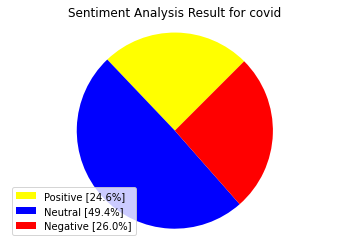

In [ ]:
#visualization of priority valuesusing piechart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellow', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=45)
plt.legend(labels)
plt.title("Sentiment Analysis Result for "+keyword+"" )
plt.axis('equal')
plt.show()


In [ ]:
#individual sentiment analysis of the tweets
tweet_list[['polarity', 'subjectivity']] = tweet_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
   tweet_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
   tweet_list.loc[index, 'sentiment'] = "positive"
 else:
   tweet_list.loc[index, 'sentiment'] = "neutral"
   tweet_list.loc[index, 'neg'] = neg
   tweet_list.loc[index, 'neu'] = neu
   tweet_list.loc[index, 'pos'] = pos
   tweet_list.loc[index, 'compound'] = comp
tweet_list.head(100)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @BLSTG: When #Master is hitting 100cr in 3 ...,when #master is hitting 100cr in 3 days even d...,-0.400000,0.700000,negative,0.0,1.0,0.0,0.0
1,RT @jyyf: (Blog)(2021年)各地区大会の開催情報・COVID-19対策につ...,(blog)(2021年)各地区大会の開催情報・covid-19対策について\n\n本年の地...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
2,RT @joannaccherry: So at last we have proper #...,so at last we have proper #border measures in ...,-0.097222,0.236111,negative,0.0,1.0,0.0,0.0
3,@cpeedell This @lucyallan @toadmeister @JuliaH...,@cpeedell this @lucyallan @toadmeister @juliah...,0.187500,0.437500,neutral,0.0,1.0,0.0,0.0
4,RT @michaellbonsujr: That first COVID / Lockdo...,that first covid / lockdown free summer i swea...,0.150000,0.644444,positive,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
98,RT @uchile: [UCHILE en la Prensa] Académico @d...,[uchile en la prensa] académico @dccuchile ric...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
99,RT @alejandrdiazz: estoy harta d los toques de...,estoy harta d los toques de queda d los confin...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
100,RT @wth_adeel: Numl wants us to give on campus...,numl wants us to give on campus exams after te...,0.200000,0.100000,negative,0.0,1.0,0.0,0.0
101,RT @philippefroguel: Covid-19 : le variant bri...,covid-19 : le variant britannique pourrait dev...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral) and calculating the percentage of each sentiments
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,220,50.93
negative,115,26.62
positive,97,22.45


Thus,we observed that the number of neutral tweets are more which means that this situation of lockdown has strongly affected everyone and shutdown of 10 months is not a joke.As,a student I feel that this situation has completely destroyed the academics of students like us and not only us but also professionals,homemakers and everyone are affected by this.